In [6]:
import enum

import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from rich import print as pprint


In [9]:
path = kagglehub.dataset_download("seymasa/rice-dataset-gonenjasmine")
df = pd.read_csv(path + '/Rice-Gonen andJasmine.csv')
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen


In [10]:
df = df.drop(['id'], axis=1)
df['Class'], _ = pd.factorize(df['Class'])
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,0
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,0
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,0
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,0
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,0
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,1
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,1
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,1
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,1


In [11]:
indices = np.arange(len(df['Class'].to_numpy()))
np.random.shuffle(indices)

X = df.drop(['Class'], axis=1).to_numpy()[indices[:500]]
y = df['Class'].to_numpy()[indices[:500]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


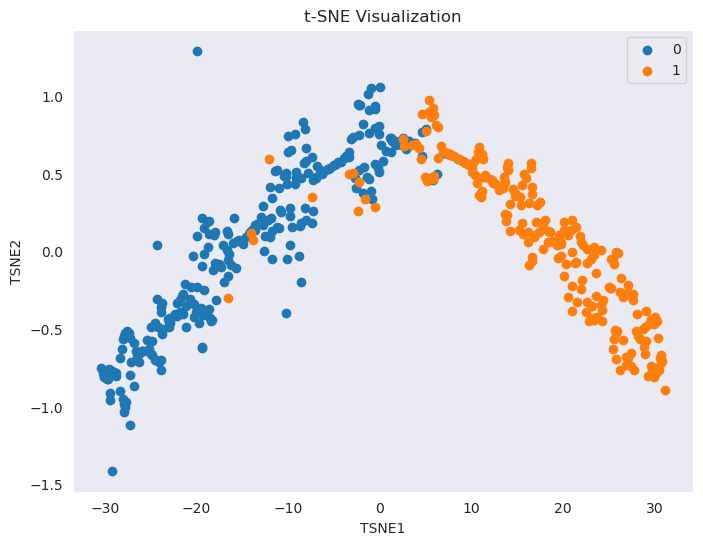

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, perplexity=50, max_iter=1000)
X_embedded = tsne.fit_transform(X)

df_tsne = pd.DataFrame(X_embedded, columns=["TSNE1", "TSNE2"])
df_tsne['label'] = y

plt.figure(figsize=(8, 6))
for label in np.unique(y):
    subset = df_tsne[df_tsne['label'] == label]
    plt.scatter(subset["TSNE1"], subset["TSNE2"], label=label)

plt.title("t-SNE Visualization")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend()
plt.grid()
plt.show()

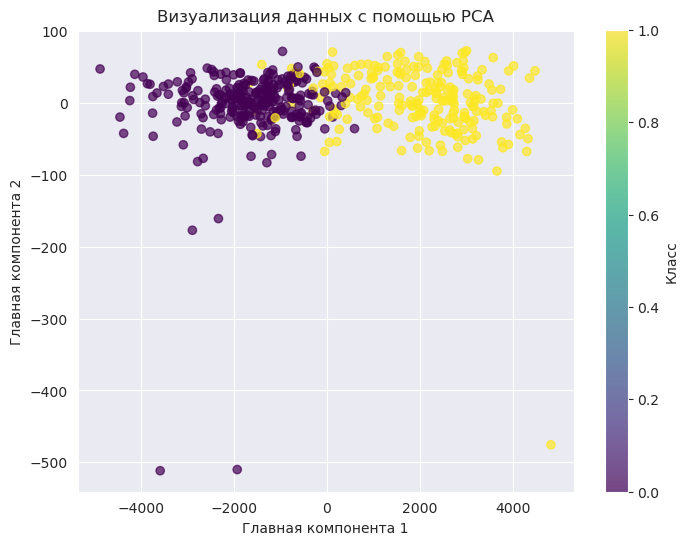

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Класс")
plt.title("Визуализация данных с помощью PCA")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.grid(True)
plt.show()

In [79]:
import enum
from enum import IntEnum, StrEnum
from tqdm import tqdm
import numpy as np
import abc
from typing import Callable, Literal


def sigmoid(x: float) -> float:
    return 1 / (1 + np.exp(-x + 1e-6))


def sigmoid_derivative(x: float) -> float:
    return x * (1 - x)


def cross_entropy(y: float, y_pred: float) -> float:
    return - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred + 1e-6))


def cross_entropy_derivative(y: float, y_pred: float) -> float:
    return y_pred - y


class Loss(abc.ABC):
    function: Callable[[float, float], float]
    derivative: Callable[[float, float], float]


class Activation(abc.ABC):
    function: Callable[[float], float]
    derivative: Callable[[float], float]


class Sigmoid(Activation):
    def __init__(self):
        self.function = sigmoid
        self.derivative = sigmoid_derivative


class CrossEntropy(Loss):
    def __init__(self):
        self.function = cross_entropy
        self.derivative = cross_entropy_derivative


class WeightInitialization(StrEnum):
    ZERO = "ZERO"
    RANDOM = "RANDOM"
    CORRELATION = "CORRELATION"
    MULTI_START = "MULTI_START"


class LinearClassifier:
    a: np.ndarray
    a_inertia: float
    b: float
    b_inertia: float
    x: np.ndarray
    y_pred: float
    activation: Activation
    loss: Loss
    learning_rate: float
    forgetting_rate: float
    regularizator: float

    def __init__(self, size: int, loss: Loss, activation: Activation, forgetting_rate: float,
                 regularizator: float = 0.0):
        self.a = np.random.rand(size)
        self.a_biased = np.zeros(size)
        self.a_inertia = 0.0
        self.b = 0.0
        self.b_biased = 0.0
        self.b_inertia = 0.0
        self.loss = loss
        self.activation = activation
        self.forgetting_rate = forgetting_rate
        self.regularizator = regularizator

    def _fit_epoch(self, X: np.ndarray, Y: np.ndarray) -> float:
        preliminary_predictions = self.predict_bulk(X)
        less_sure_predictions = 1 / (np.abs(preliminary_predictions) + 1e-6)
        shuffling_probability_coefficients = less_sure_predictions / np.sum(less_sure_predictions)
        sample_indices = np.random.choice(a=len(X), size=X.shape[0], replace=False,
                                          p=shuffling_probability_coefficients)
        loss = 0.0
        for idx, (x, y) in enumerate(zip(X[sample_indices], Y[sample_indices])):
            loss += self._fit_iteration(x, y)
        return loss

    def fit(
            self,
            X: np.ndarray,
            Y: np.ndarray,
            epoch_count: int = 5,
            weight_init: WeightInitialization = WeightInitialization.RANDOM
    ) -> np.ndarray:
        self._weight_init(weight_init, X, Y)
        losses = np.zeros(epoch_count)
        for epoch in tqdm(range(epoch_count)):
            losses[epoch] = self._fit_epoch(X, Y)
        return np.array(losses) / len(X)

    def _weight_init(self, method: WeightInitialization, X: np.ndarray, Y: np.ndarray) -> tuple[np.ndarray, float]:
        self.a_inertia = 0.0
        self.a_biased = 0.0
        self.b_inertia = 0.0
        self.b_biased = 0.0

        match method:
            case WeightInitialization.ZERO:
                self.a = np.zeros(self.a.shape[0])
                self.b = 0.0
            # обучить со случайным предъявлением и с п.8;
            case WeightInitialization.RANDOM:
                self.a = (np.random.rand(self.a.shape[0]) - 0.5) / len(X)
                self.b = (np.random.rand() - 0.5 )/ len(X) 
            # обучить с инициализацией весов через корреляцию (п.3, слайд 14);
            case WeightInitialization.CORRELATION:
                for j in range(self.a.shape[0]):
                    self.a[j] = np.sum(Y * X.T[j]) / np.sum(X.T[j] ** 2)
                self.b = np.mean(y) - np.dot(np.mean(X, axis=0), self.a)
            # обучить со случайной инициализацией весов через мультистарт (п.5, слайд 14);
            case WeightInitialization.MULTI_START:
                variance_count = 10

                A, B = np.zeros((variance_count, self.a.shape[0])), np.zeros(variance_count)
                losses = np.zeros(variance_count)
                for variance in range(variance_count):
                    self._weight_init(WeightInitialization.RANDOM, X, Y)
                    A[variance], B[variance], losses[variance] = self.a, self.b, self._fit_epoch(X, Y)
                best_variance = np.argmin(losses)
                self.a, self.b = A[best_variance], B[best_variance]
        return self.a, self.b

    def predict(self, x: np.ndarray) -> float:
        return self._forward(x)

    def predict_bulk(self, X: np.ndarray) -> np.ndarray:
        return np.array([self.predict(x) for x in X])

    def _fit_iteration(self, x: np.ndarray, y_true: float):
        y_pred = self._forward(x)

        loss_derivative = self.loss.derivative(y_true, y_pred)

        self._backward(loss_derivative)
        return self.loss.function(y_true, y_pred)

    def _forward(self, x: np.ndarray) -> float:
        self.x = x.copy()
        self.learning_rate = np.power(np.linalg.norm(self.x) + 1e-7, np.float32(-2.0))

        self.a_biased = self.a - self.learning_rate * self.forgetting_rate * self.a_inertia
        self.b_biased = self.b - self.learning_rate * self.forgetting_rate * self.b_inertia

        self.y_pred = self.activation.function(np.dot(self.x, self.a_biased) + self.b_biased)
        return self.y_pred

    def _backward(self, error_signal: float) -> None:
        gradient = error_signal * self.activation.derivative(self.y_pred)

        self.a_inertia = self.a_inertia * self.forgetting_rate + (1 - self.forgetting_rate) * gradient * self.x
        self.b_inertia = self.b_inertia * self.forgetting_rate + (1 - self.forgetting_rate) * gradient
        self.a[...] = self.a * (1 - self.learning_rate * self.regularizator) - self.learning_rate * self.a_inertia
        self.b += - self.learning_rate * self.b_inertia

In [80]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

y_train_processed = np.array([1 if y == 1 else -1 for y in y_train])
X_train_processed = min_max_scaler.fit_transform(X_train)
X_test_processed = min_max_scaler.transform(X_test)

In [81]:
# Создание экземпляра LinearClassifier
lc = LinearClassifier(
    size=X.shape[1],
    loss=CrossEntropy(),
    activation=Sigmoid(),
    forgetting_rate=0.95
)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0


100%|██████████| 50/50 [00:00<00:00, 182.80it/s]


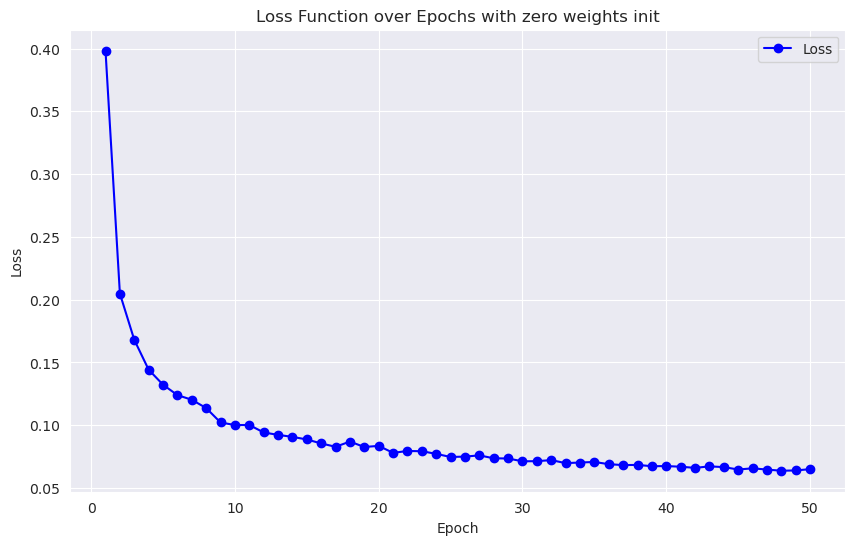

Classification report after training:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.98      0.98      0.98        43

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [75]:
loss = lc.fit(X_train_processed, y_train, epoch_count=50, weight_init=WeightInitialization.ZERO)

epochs = np.arange(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', color='b', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function over Epochs with zero weights init')
plt.legend()
plt.grid(True)
plt.show()

final_predictions = np.array(np.round(list(map(lc.predict, X_test_processed))), dtype=np.uint)
print("Classification report after training:")
print(classification_report(y_test, final_predictions, zero_division=0))


[ 2.30123015e-04  6.69092828e-04  6.70779629e-04  1.17144512e-03
  9.04565408e-04 -6.97969915e-04 -8.00112967e-04 -1.95401621e-04
  8.34449158e-04 -9.90842272e-05] -0.0009442721364671025


100%|██████████| 50/50 [00:00<00:00, 186.12it/s]


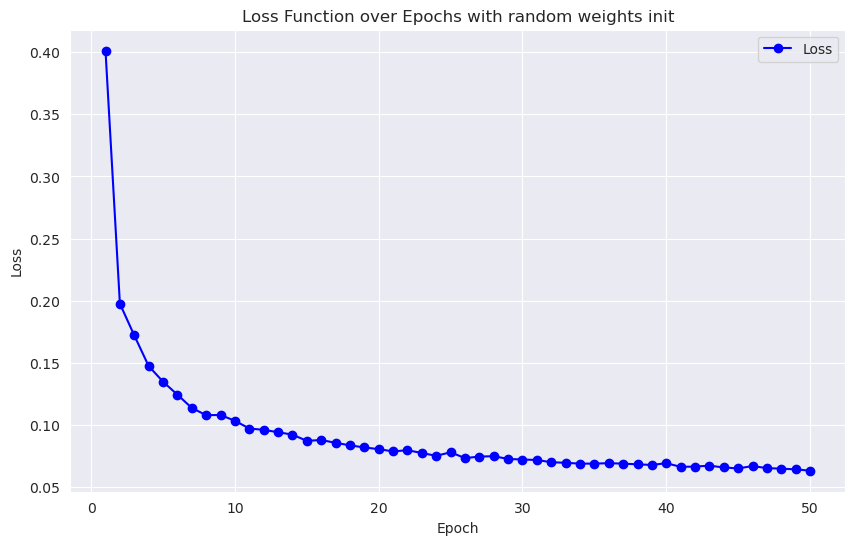

Classification report after training:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.98      0.98      0.98        43

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [76]:
loss = lc.fit(X_train_processed, y_train, epoch_count=50, weight_init=WeightInitialization.RANDOM)

epochs = np.arange(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', color='b', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function over Epochs with random weights init')
plt.legend()
plt.grid(True)
plt.show()

final_predictions = np.array(np.round(list(map(lc.predict, X_test_processed))), dtype=np.uint)
print("Classification report after training:")
print(classification_report(y_test, final_predictions, zero_division=0))


100%|██████████| 50/50 [00:00<00:00, 184.56it/s]


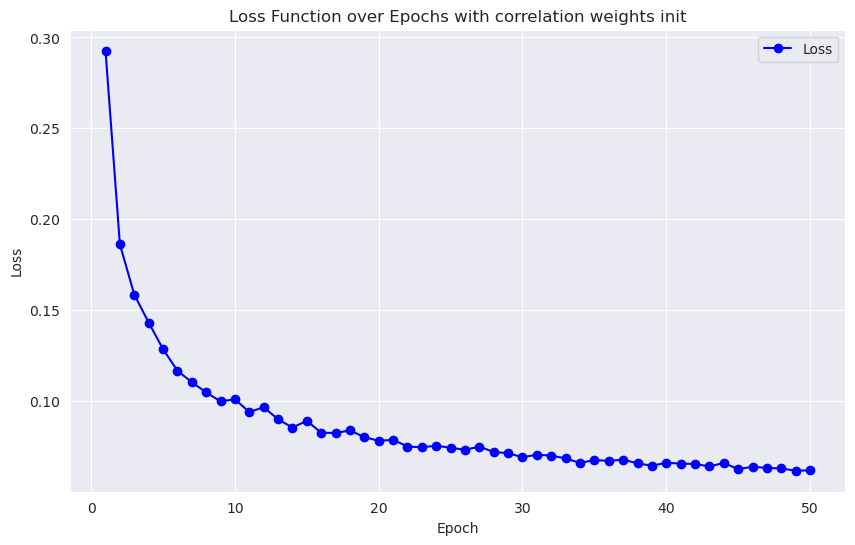

Classification report after training:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.98      0.98      0.98        43

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [82]:
loss = lc.fit(X_train_processed, y_train, epoch_count=50, weight_init=WeightInitialization.CORRELATION)

epochs = np.arange(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', color='b', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function over Epochs with correlation weights init')
plt.legend()
plt.grid(True)
plt.show()

final_predictions = np.array(np.round(list(map(lc.predict, X_test_processed))), dtype=np.uint)
print("Classification report after training:")
print(classification_report(y_test, final_predictions, zero_division=0))


[ 0.98998816 -0.29745654  1.34010042 -1.58866656  0.89699571  0.90643959
  0.16067685  0.13281581  0.20950113 -1.48294074] 0.0003675526834473561


100%|██████████| 50/50 [00:00<00:00, 178.00it/s]


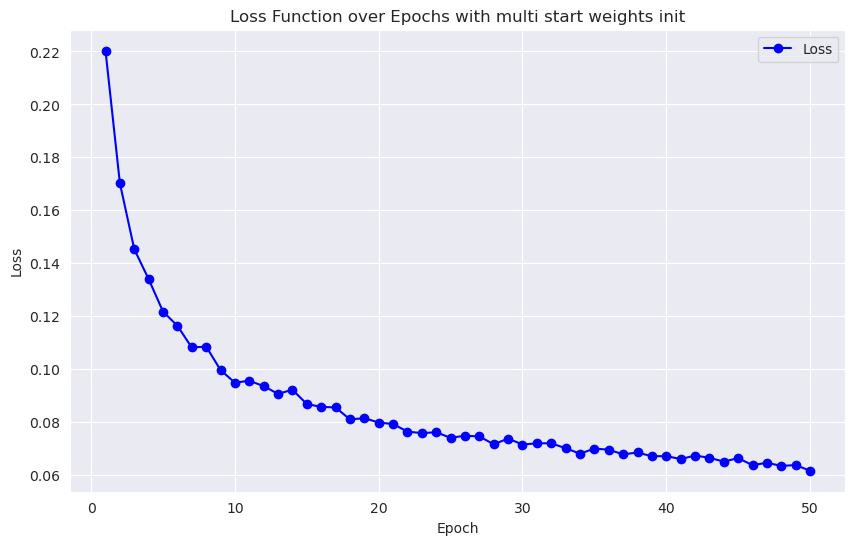

Classification report after training:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.98      0.98      0.98        43

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [78]:
loss = lc.fit(X_train_processed, y_train, epoch_count=50, weight_init=WeightInitialization.MULTI_START)

epochs = np.arange(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', color='b', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function over Epochs with multi start weights init')
plt.legend()
plt.grid(True)
plt.show()

final_predictions = np.array(np.round(list(map(lc.predict, X_test_processed))), dtype=np.uint)
print("Classification report after training:")
print(classification_report(y_test, final_predictions, zero_division=0))


In [36]:
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       1.00      0.98      0.99        43

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [83]:
%timeit lc.fit(X_train_processed, y_train, epoch_count=50, weight_init=WeightInitialization.ZERO)

100%|██████████| 50/50 [00:00<00:00, 175.09it/s]

298 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%timeit model.fit(X_train, y_train)

549 μs ± 2.42 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:


import math
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
from pyDOE import lhs


def sort_clockwise(points):
    # Вычисление центроида (среднее значение всех x и y)
    centroid_x = sum(x for x, y in points) / len(points)
    centroid_y = sum(y for x, y in points) / len(points)

    # Функция для вычисления угла точки относительно центроида
    def angle_from_centroid(point):
        x, y = point
        return math.atan2(y - centroid_y, x - centroid_x)

    # Сортировка точек по углу относительно центроида (по часовой стрелке)
    sorted_points = sorted(points, key=angle_from_centroid, reverse=True)

    return sorted_points


def project_point_to_plane(x: np.ndarray, a: np.ndarray, b: float):
    t = (np.dot(a, x) + b) / np.dot(a, a)
    projection = x - t * a
    return projection


def draw_hyperplane(X: np.ndarray, a: np.ndarray, b: float) -> None:
    X_projections = np.array([project_point_to_plane(x, a, b) for x in X])
    classifications = np.sign(np.dot(X, a) + b)
    l, n, *_ = X.shape
    borders = 0, 1
    plane_grid = np.array(list(map(lambda plane_grid_locality: project_point_to_plane(plane_grid_locality, a, b),
                                   list(product(*[borders, ] * n)))))
    plane_grid = np.array([(*borders,) for _ in range(n)])
    plane_grid = np.array([project_point_to_plane(plane_grid_locality, a, b) for plane_grid_locality in
                           product(plane_grid, plane_grid, plane_grid, plane_grid)])
    # plane_grid = lhs(n, samples=10**n)
    # plane_grid = plane_grid * (borders[1] - borders[0]) + borders[0]
    # plane_grid = np.array([project_point_to_plane(plane_grid_locality, a, b) for plane_grid_locality in plane_grid])
    fig, axes = plt.subplots(n, n, figsize=(n * 12, n * 12))
    for i, j in product(range(n), range(n)):
        if i == j:
            axes[i, j].axis('off')
            continue

        # axes[i, j].scatter(
        #     plane_grid[:, i],
        #     plane_grid[:, j],
        #     color="red",
        #     # s=7.5,
        #     s=25,
        #     label="Гиперплоскость",
        #     alpha=0.15,
        # )
        polygon = Polygon(sort_clockwise(plane_grid[:, [i, j]]), closed=True, edgecolor='b', facecolor='orange',
                          alpha=0.5)
        axes[i, j].add_patch(polygon)

        if np.any(indices := classifications == 1):
            axes[i, j].scatter(X[indices][:, i], X[indices][:, j], label="Точки с положительным классом", s=300,
                               edgecolor='black', color='lime')
            axes[i, j].scatter(X_projections[indices][:, i], X_projections[indices][:, j], color="green",
                               label="Проекция", s=300, marker='x')
        if np.any(indices := classifications == -1):
            axes[i, j].scatter(X[indices][:, i], X[indices][:, j], label="Точки с негативным классом", s=300,
                               color='purple', edgecolors='black', )
            axes[i, j].scatter(X_projections[indices][:, i], X_projections[indices][:, j], color="green",
                               label="Проекция", s=300, marker='x')
        if np.any(indices := classifications == 0):
            axes[i, j].scatter(X[indices][:, i], X[indices][:, j], label="Точка, лежащая на гиперплоскости", s=300,
                               color='cyan', edgecolors='black', )

        for x, x_projection in zip(X, X_projections):
            axes[i, j].plot([x[i], x_projection[i]], [x[j], x_projection[j]], color="black", linewidth=3)

        axes[i, j].legend(prop={'size': 18}, markerscale=1.2)
        axes[i, j].grid(True)
        axes[i, j].axhline(0, color="black", linewidth=0.5, linestyle="--")
        axes[i, j].axvline(0, color="black", linewidth=0.5, linestyle="--")
        axes[i, j].set_aspect('equal', adjustable='box')
        axes[i, j].set_xlim(*borders)
        axes[i, j].set_ylim(*borders)
        axes[i, j].set_xlabel(f"Компонента {i + 1}")
        axes[i, j].set_ylabel(f"Компонента {j + 1}")

    plt.tight_layout()
    plt.show()

# a = np.array([0.5, -0.5, 0.25])
# b = -7.5
# x = np.array([
#     [20, 4, 10],
#     [-20, 2, -15],
#     [30, 30, 30],
# ])
# a = lc.a
# b = lc.b
# x = X_test_processed[:10, :4]
# draw_hyperplane(x, a[:4], b)